## Gaussian Mixture Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('tmp_data.csv')
df

,Unnamed: 0,A,B,C,D
0,사직동,0.756808,0.837151,0.367741,0.856218
1,삼청동,0.827742,0.304679,0.923518,0.000679
2,부암동,0.568917,0.924518,0.056251,0.260088
3,평창동,0.580705,0.584580,0.844815,0.060866
4,무악동,0.139818,0.303443,0.598331,0.312935
...,...,...,...,...,...
421,성내3동,0.080882,0.473552,0.109079,0.319963
422,둔촌1동,0.879560,0.419096,0.563044,0.629431
423,둔촌2동,0.984323,0.984479,0.826605,0.679809
424,상일1동,0.479461,0.830551,0.686072,0.301943


In [3]:
df.rename(columns={'Unnamed: 0':'동이름'},inplace=True)
df.set_index('동이름')

,A,B,C,D
동이름,,,,
사직동,0.756808,0.837151,0.367741,0.856218
삼청동,0.827742,0.304679,0.923518,0.000679
부암동,0.568917,0.924518,0.056251,0.260088
평창동,0.580705,0.584580,0.844815,0.060866
무악동,0.139818,0.303443,0.598331,0.312935
...,...,...,...,...
성내3동,0.080882,0.473552,0.109079,0.319963
둔촌1동,0.879560,0.419096,0.563044,0.629431
둔촌2동,0.984323,0.984479,0.826605,0.679809


In [4]:
df_idx = df['동이름']

In [5]:
del(df['동이름'])

In [6]:
df

,A,B,C,D
0,0.756808,0.837151,0.367741,0.856218
1,0.827742,0.304679,0.923518,0.000679
2,0.568917,0.924518,0.056251,0.260088
3,0.580705,0.584580,0.844815,0.060866
4,0.139818,0.303443,0.598331,0.312935
...,...,...,...,...
421,0.080882,0.473552,0.109079,0.319963
422,0.879560,0.419096,0.563044,0.629431
423,0.984323,0.984479,0.826605,0.679809
424,0.479461,0.830551,0.686072,0.301943


In [7]:
data = df.values.tolist()

In [8]:
# GMM 적용
from sklearn.mixture import GaussianMixture
# n_components로 미리 군집 개수 설정
gmm = GaussianMixture(n_components=10, n_init=3, random_state=0).fit(data)
# n_init : 모델 반복 횟수 -> 파라미터를 무작위로 선정하여 수렴할 때까지 학습
gmm_labels = gmm.predict(data)

In [9]:
# GMM 후 클러스터링 레이블을 따로 설정
df['gmm_cluster_3'] = gmm_labels

In [10]:
df['gmm_cluster_3'].value_counts()

2    80
9    54
7    53
4    50
1    39
3    35
8    33
6    32
0    27
5    23
Name: gmm_cluster_3, dtype: int64

In [11]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(data, df['gmm_cluster_3'])
df['silhouette_coeff']=score_samples

print()

average_score = silhouette_score(data, df['gmm_cluster_3'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.133


In [12]:
df.groupby('gmm_cluster_3')['silhouette_coeff'].mean()

gmm_cluster_3
0    0.117137
1    0.084652
2    0.108367
3    0.256795
4    0.012322
5    0.325866
6    0.226795
7    0.126194
8    0.249692
9    0.042302
Name: silhouette_coeff, dtype: float64

In [13]:
df['동이름'] = df_idx
df

,A,B,C,D,gmm_cluster_3,silhouette_coeff,동이름
0,0.756808,0.837151,0.367741,0.856218,1,0.295022,사직동
1,0.827742,0.304679,0.923518,0.000679,7,0.069865,삼청동
2,0.568917,0.924518,0.056251,0.260088,4,-0.206498,부암동
3,0.580705,0.584580,0.844815,0.060866,9,-0.287152,평창동
4,0.139818,0.303443,0.598331,0.312935,2,0.153645,무악동
...,...,...,...,...,...,...,...
421,0.080882,0.473552,0.109079,0.319963,2,-0.286903,성내3동
422,0.879560,0.419096,0.563044,0.629431,7,0.134143,둔촌1동
423,0.984323,0.984479,0.826605,0.679809,9,0.146874,둔촌2동
424,0.479461,0.830551,0.686072,0.301943,6,0.283064,상일1동


In [14]:
df.set_index('동이름')

,A,B,C,D,gmm_cluster_3,silhouette_coeff
동이름,,,,,,
사직동,0.756808,0.837151,0.367741,0.856218,1,0.295022
삼청동,0.827742,0.304679,0.923518,0.000679,7,0.069865
부암동,0.568917,0.924518,0.056251,0.260088,4,-0.206498
평창동,0.580705,0.584580,0.844815,0.060866,9,-0.287152
무악동,0.139818,0.303443,0.598331,0.312935,2,0.153645
...,...,...,...,...,...,...
성내3동,0.080882,0.473552,0.109079,0.319963,2,-0.286903
둔촌1동,0.879560,0.419096,0.563044,0.629431,7,0.134143
둔촌2동,0.984323,0.984479,0.826605,0.679809,9,0.146874


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주 성분의 갯수 : 2
pca_transformed = pca.fit_transform(data)
df['pca_x']=pca_transformed[:,0]
df['pca_y']=pca_transformed[:,1]

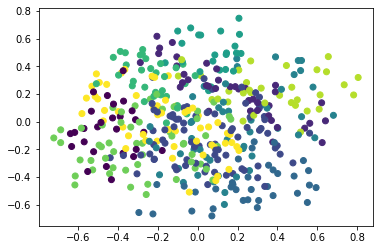

In [16]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['gmm_cluster_3'])

In [17]:
gmm = GaussianMixture(n_components=10, n_init=10, random_state=0).fit(data)
gmm_labels = gmm.predict(data)
df['gmm_cluster_10'] = gmm_labels
df['gmm_cluster_10'].value_counts()

2    80
9    54
7    53
4    50
1    39
3    35
8    33
6    32
0    27
5    23
Name: gmm_cluster_10, dtype: int64

In [18]:
score_samples = silhouette_samples(data, df['gmm_cluster_10'])
df['silhouette_coeff_10']=score_samples

print()

average_score = silhouette_score(data, df['gmm_cluster_10'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.133


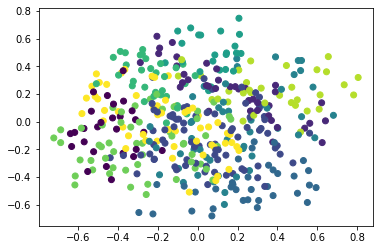

In [19]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['gmm_cluster_10'])

In [20]:
gmm = GaussianMixture(n_components=10, n_init=100, random_state=0).fit(data)
gmm_labels = gmm.predict(data)
df['gmm_cluster_100'] = gmm_labels
df['gmm_cluster_100'].value_counts()

9    75
2    74
8    63
5    38
4    37
0    35
6    33
3    26
7    25
1    20
Name: gmm_cluster_100, dtype: int64

In [21]:
score_samples = silhouette_samples(data, df['gmm_cluster_100'])
df['silhouette_coeff_100']=score_samples

print()

average_score = silhouette_score(data, df['gmm_cluster_100'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.114


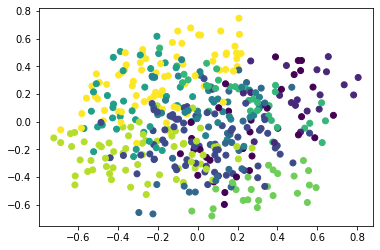

In [22]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['gmm_cluster_100'])

In [23]:
gmm = GaussianMixture(n_components=10, n_init=1000, random_state=0).fit(data)
gmm_labels = gmm.predict(data)
df['gmm_cluster_1000'] = gmm_labels
df['gmm_cluster_1000'].value_counts()

5    88
6    74
3    46
2    44
4    37
1    36
0    34
9    26
7    22
8    19
Name: gmm_cluster_1000, dtype: int64

In [24]:
score_samples = silhouette_samples(data, df['gmm_cluster_1000'])
df['silhouette_coeff_1000']=score_samples

print()

average_score = silhouette_score(data, df['gmm_cluster_1000'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.076


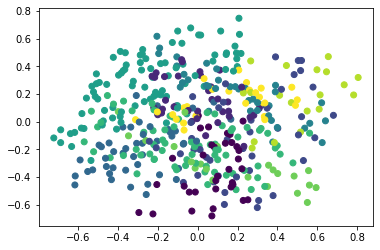

In [25]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['gmm_cluster_1000'])

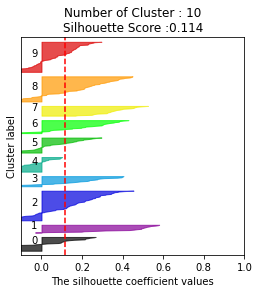

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

X_features = df[['A','B','C','D']].values
cluster = GaussianMixture(n_components=10, n_init=100, random_state=0)
cluster_labels = cluster.fit_predict(data)
sil_avg = silhouette_score(X_features,cluster_labels)
sil_values = silhouette_samples(X_features,cluster_labels)

y_lower = 10
fig, axs = plt.subplots(figsize=(4, 4), nrows=1, ncols=1)

axs.set_title('Number of Cluster : '+ str(10)+'\n' \
                  'Silhouette Score :' + str(round(sil_avg,3)) )
axs.set_xlabel("The silhouette coefficient values")
axs.set_ylabel("Cluster label")
axs.set_xlim([-0.1, 1])
axs.set_ylim([0, len(X_features) + (10 + 1) * 10])
axs.set_yticks([])  # Clear the yaxis labels / ticks
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

for i in range(10):
    ith_cluster_sil_values = sil_values[cluster_labels==i]
    ith_cluster_sil_values.sort()

    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 10)
    axs.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
    axs.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axs.axvline(x=sil_avg, color="red", linestyle="--")

In [27]:
best_n = 0
best_silhouette_score = 0

for i in range(2,21):
    gmm = GaussianMixture(n_components=i, n_init=10, random_state=0).fit(data)
    gmm_labels = gmm.predict(data)
    
    score_samples = silhouette_samples(data, gmm_labels)
    average_score = silhouette_score(data, gmm_labels)
    print('Silhouette Analysis Score:{0:.3f}'.format(average_score))
    print()
    
    if average_score > best_silhouette_score:
        best_n = i
        best_silhouette_score = average_score
print('best n :', best_n, 'best score :', best_silhouette_score)

Silhouette Analysis Score:0.196

Silhouette Analysis Score:0.160

Silhouette Analysis Score:0.156

Silhouette Analysis Score:0.169

Silhouette Analysis Score:0.179

Silhouette Analysis Score:0.172

Silhouette Analysis Score:0.154

Silhouette Analysis Score:0.130

Silhouette Analysis Score:0.133

Silhouette Analysis Score:0.139

Silhouette Analysis Score:0.142

Silhouette Analysis Score:0.130

Silhouette Analysis Score:0.145

Silhouette Analysis Score:0.106

Silhouette Analysis Score:0.107

Silhouette Analysis Score:0.116

Silhouette Analysis Score:0.103

Silhouette Analysis Score:0.123

Silhouette Analysis Score:0.125

best n : 2 best score : 0.1955030160745496


#### 기존 데이터에 Standard Scaler 적용

In [28]:
X_features = df[['A','B','C','D']].values

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_features_scaled = StandardScaler().fit_transform(data)

(array([1., 0., 0., 0., 0., 0., 2., 0., 0., 1.]),
 array([-1.39131647, -1.13246974, -0.873623  , -0.61477626, -0.35592953,
        -0.09708279,  0.16176394,  0.42061068,  0.67945742,  0.93830415,
         1.19715089]),
 <BarContainer object of 10 artists>)

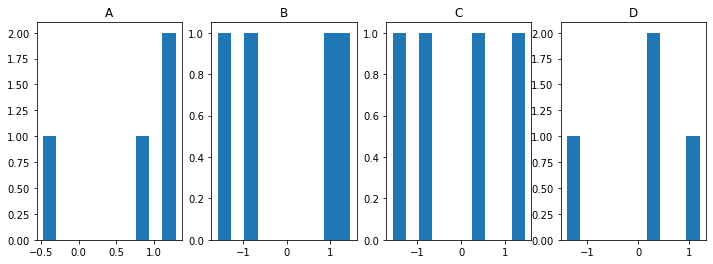

In [40]:
# 히스토그램 확인
fig, (ax1,ax2,ax3,ax4) = plt.subplots(figsize=(12,4),nrows=1, ncols=4)

ax1.set_title('A')
ax1.hist(X_features_scaled[0])

ax2.set_title('B')
ax2.hist(X_features_scaled[1])

ax3.set_title('C')
ax3.hist(X_features_scaled[2])

ax4.set_title('D')
ax4.hist(X_features_scaled[3])

In [31]:
data

[[0.7568084774180681,
  0.8371506301304996,
  0.3677408310698434,
  0.8562179103596124],
 [0.827741759254558,
  0.3046790764719523,
  0.9235180581525309,
  0.0006785257752056],
 [0.5689170470455052,
  0.9245182463691028,
  0.0562506879238718,
  0.2600881368220651],
 [0.5807052259668412,
  0.5845801565040853,
  0.8448154590448849,
  0.0608664112887608],
 [0.139817978327202,
  0.303442937941433,
  0.5983311151016941,
  0.3129345358545581],
 [0.3394702117410638,
  0.2888845125195161,
  0.2659268641450321,
  0.9486166626194644],
 [0.2996086788676775,
  0.8961944511017427,
  0.0160874986489877,
  0.418956747994531],
 [0.5016496668610635,
  0.0523651962636722,
  0.1566940153294754,
  0.7973115616703601],
 [0.8214699571095224,
  0.4413872885623141,
  0.3692363195992904,
  0.2869264885443985],
 [0.827575125352748,
  0.8840915926527609,
  0.2356078227798846,
  0.5924301201869727],
 [0.2650296128187374,
  0.0474490009370272,
  0.9680521527622884,
  0.3314141458963258],
 [0.8236801951546683,
  0.

In [32]:
X_features

array([[7.56808477e-01, 8.37150630e-01, 3.67740831e-01, 8.56217910e-01],
       [8.27741759e-01, 3.04679076e-01, 9.23518058e-01, 6.78525775e-04],
       [5.68917047e-01, 9.24518246e-01, 5.62506879e-02, 2.60088137e-01],
       ...,
       [9.84323114e-01, 9.84478739e-01, 8.26605419e-01, 6.79808782e-01],
       [4.79460525e-01, 8.30551240e-01, 6.86071676e-01, 3.01942920e-01],
       [1.15109866e-01, 6.31007911e-01, 2.12659664e-01, 2.61508363e-01]])

In [33]:
tmp_df = df.copy()

In [41]:
gmm = GaussianMixture(n_components=10, n_init=10, random_state=0).fit(X_features_scaled)
gmm_labels = gmm.predict(X_features_scaled)
tmp_df['gmm_cluster'] = gmm_labels
tmp_df['gmm_cluster'].value_counts()
score_samples = silhouette_samples(X_features_scaled, tmp_df['gmm_cluster'])
df['silhouette_coeff']=score_samples

print()

average_score = silhouette_score(X_features_scaled, tmp_df['gmm_cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.131


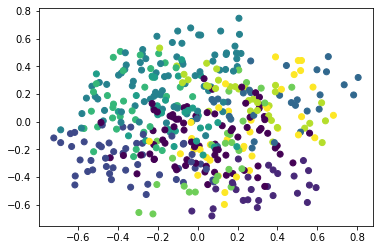

In [42]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=tmp_df['gmm_cluster'])

In [ ]:
user = [4, 3, 1, 5]